In [2]:
import torch
from torchvision import datasets
import torchvision
import numpy as np
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from tqdm import tqdm
from matplotlib.lines import Line2D


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
#device = "cuda" if torch.cuda.is_available() else "cpu"


In [4]:

device

'cuda'

In [5]:
# loading and storing FashionMnist the datset from torchvision

In [6]:
fashion = torchvision.datasets.FashionMNIST("/data/fashion",train=True,download=True )
#fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /data/fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to /data/fashion/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /data/fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /data/fashion/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /data/fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /data/fashion/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /data/fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /data/fashion/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
fashion

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /data/fashion
    Split: Train

In [8]:
images  = fashion.data
labels = fashion.targets

In [ ]:
images.shape

torch.Size([60000, 28, 28])

In [ ]:
images[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
labels.shape

torch.Size([60000])

In [ ]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
fashion.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

[]

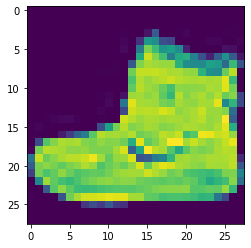

In [ ]:
plt.imshow(images[0])
plt.plot()

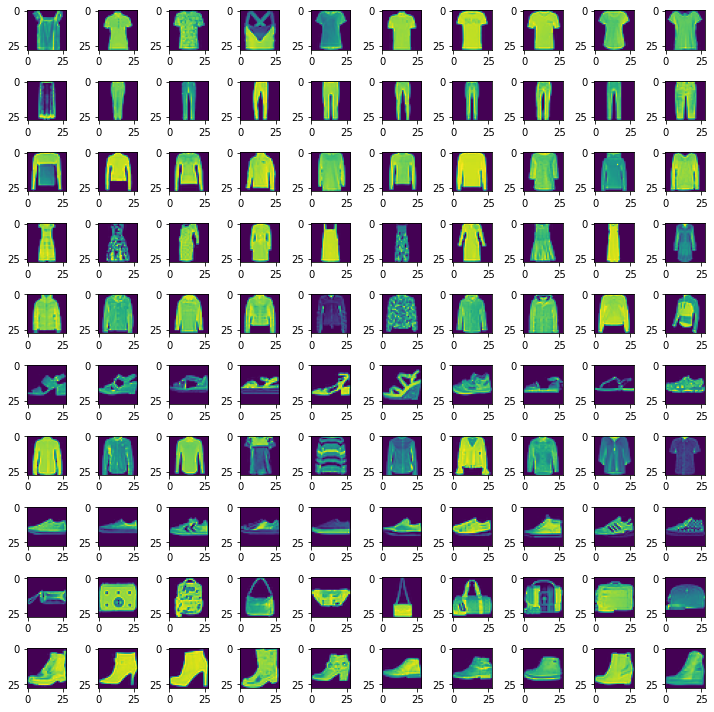

In [ ]:
# to print 10 random images from each unique class 

rows , cols = len(labels.unique()), 10

fig, ax = plt.subplots(rows, cols, figsize=(10,10))

for label, plot in enumerate(ax):
  indices = np.where(label==labels)[0]  # returns the array of indeces of classes where row label matches 
  for i in plot:
    val = np.random.choice(indices)
    i.imshow(images[val])

plt.tight_layout()  

In [ ]:
# defining the Dataset and Dataloader classes for handling data 

In [9]:
class Fashiondata(Dataset):

  # class defined for storing the data and proving it for the loader dataset.

  def __init__(self,x,y):
    x = x.float()
    x = x/255000.0
    self.x = x.view(-1,28*28)             # since x, y are already tensors while loading, no need to convert again
    self.y = y

  def __getitem__(self,ix):                         # returns the data of particular index 
    x,y = self.x[ix], self.y[ix]
    return x.to(device), y.to(device)              # to device is stored only for the batches that we are currently computing not for all the datapoints

  def __len__(self):                                # returns the length, this is used by Dataloader, for calculating the number of batches for each epoch
    return len(self.x)


In [10]:
fdata  = Fashiondata(images,labels)

In [11]:
fdata[0]

(tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e

In [12]:
def dataloader():                                           # function for returning the dataloder
  fdata = Fashiondata(images,labels)
  dloader = DataLoader(fdata, batch_size=250, shuffle=True)
  return dloader

In [13]:
dloader = dataloader()

In [ ]:
for i,j in dloader:
  print(" i ",i.shape)
  print("j ",j.shape)
  break

 i  torch.Size([32, 784])
j  torch.Size([32])


In [14]:
# defining the function to return model, loss and optimizer  

def essentials(learning_rate):
  model = nn.Sequential(
    nn.Linear(28*28, 1000),
    nn.ReLU(),
    nn.Linear(1000,10)
    ).to(device)

  optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

  loss_fun = nn.CrossEntropyLoss()           # expects the not-normalized inputs

  return model, optimizer, loss_fun 
  


In [ ]:
def plot_grad_flow(named_parameters):
    '''Plots the gradients flowing through different layers in the net during training.
    Can be used for checking for possible gradient vanishing / exploding problems.
    
    Usage: Plug this function in Trainer class after loss.backwards() as 
    "plot_grad_flow(self.model.named_parameters())" to visualize the gradient flow'''
    ave_grads = []
    max_grads= []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
            max_grads.append(p.grad.abs().max())
    plt.bar(np.arange(len(max_grads)), max_grads, alpha=0.1, lw=1, color="c")
    plt.bar(np.arange(len(max_grads)), ave_grads, alpha=0.1, lw=1, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, lw=2, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(left=0, right=len(ave_grads))
    plt.ylim(bottom = -0.001, top=0.02) # zoom in on the lower gradient regions
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    plt.legend([Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="b", lw=4),
                Line2D([0], [0], color="k", lw=4)], ['max-gradient', 'mean-gradient', 'zero-gradient'])

In [15]:
def plot_distribution(named_parameters):

  for index, param in enumerate(named_parameters):
    print(f" Distribution of {param[0]} ")
    plt.hist(param[1].cpu().detach().numpy().flatten())
    plt.show()


In [16]:
# function to train the model on each batch and return the batch loss

def train_batch(x, y, model, optimizer, lss_fun):
  
  # try:
    model.train()                                                 # setting the flag to train because techniques like dropout and batch_norm work different while test, thus its mentioned
  
  # print(type(model)) 
    pred = model(x)  
  # print(pred.shape)
  # print(y.shape) 

  # print("pred device", pred.get_device())
  # print("target device ", y.get_device())
  
    loss = lss_fun(pred, y)              # pred should be (#batchlength, #classes)  and y should be (# batchlength)
  # print("s")
    loss.backward()
    #plot_grad_flow(model.named_parameters())
    optimizer.step()
    optimizer.zero_grad()
    return loss.item() 

  # except: 
  #   print(" predicted " ,pred) 
  #   print(" true ", y) 



In [17]:
model, optimizer, loss_fun  = essentials(0.001)

 Distribution of 0.weight 


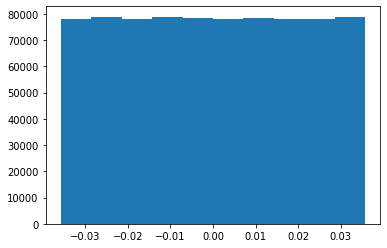

 Distribution of 0.bias 


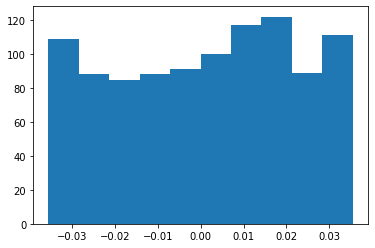

 Distribution of 2.weight 


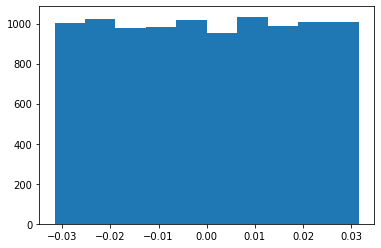

 Distribution of 2.bias 


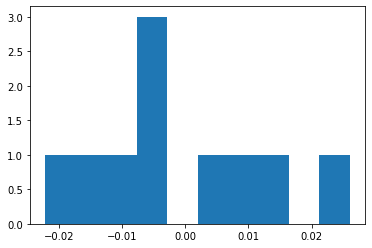

In [ ]:
# for i,j in enumerate(model.named_parameters()):
#   plt.hist(j[1].cpu().detach().numpy().flatten())
#   # print(i, "and ", j[0])
#   break


plot_distribution(model.named_parameters())

In [18]:
for x,y in dloader:
  print(train_batch(x,y,model,optimizer, loss_fun))
  break

2.3007893562316895


In [ ]:
torch.cuda.is_available()

True

In [19]:
# function to define the model evaluation
@torch.no_grad()
def evaluation(model,x,y):
  model.eval()

  pred = model(x)         # res will be (batch_size, classes)

  val, index = torch.max(pred,1)
   
  final = index==y 
  
  return final.cpu().numpy().tolist()
  


In [ ]:
np.mean([1,2,4])

2.3333333333333335

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


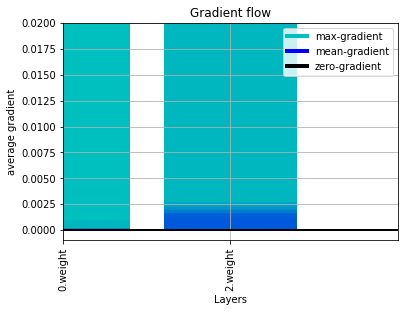

In [ ]:
# train for 50 epochs 

epoch_loss, epoch_acc = [], []
for _ in range(5):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))


 Distribution of 0.weight 


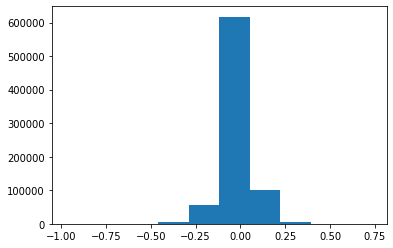

 Distribution of 0.bias 


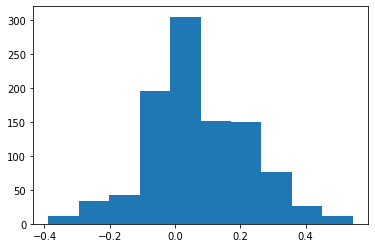

 Distribution of 2.weight 


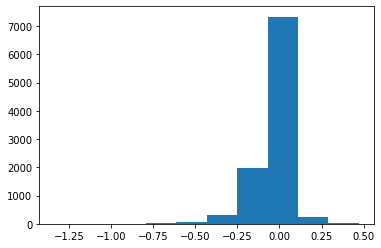

 Distribution of 2.bias 


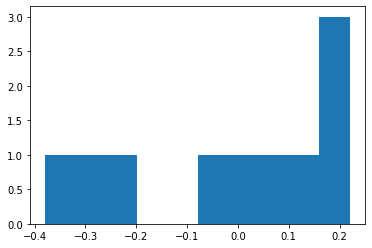

In [ ]:
plot_distribution(model.named_parameters())

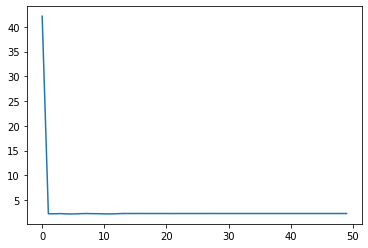

In [ ]:
plt.plot(epoch_loss)

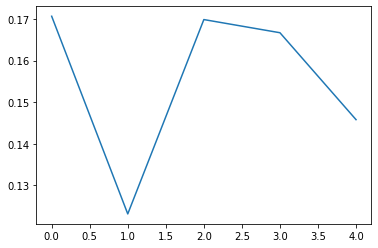

In [ ]:
plt.plot(epoch_acc)

In [ ]:
# unscaled, 0.01 lr and 50 epochs

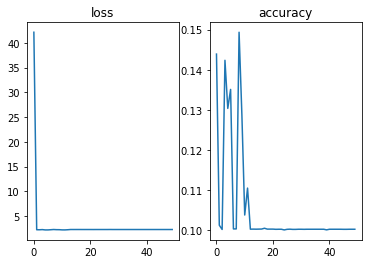

In [ ]:
plt.subplot(121)
plt.title("loss")
plt.plot(epoch_loss)

plt.subplot(122)
plt.title("accuracy")
plt.plot(epoch_acc)

In [ ]:
fdata = Fashiondata(images,labels)

In [ ]:
fdata[0]

(tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,   0.,   0.,
           0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,
           0.,   0.,   1.,   3.,   4.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,  

In [ ]:
model(fdata[0][0].view(-1,28*28))

tensor([[  3.3714,  -5.9808,  -7.5576,  -6.4401, -15.1101,   8.9328,  -4.1153,
          10.1820,  -5.3774,  25.7885]], device='cuda:0',
       grad_fn=<AddmmBackward>)

In [ ]:
model(fdata[10][0].view(-1,28*28))

tensor([[15.7958, -4.3080, -4.9474,  9.4793, -5.2951, -4.6755, 10.5968, -8.0424,
         -1.4562, -5.9080]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
fdata[10][1]

tensor(0, device='cuda:0')

model is training pretty decently even when it is unscaled



In [ ]:
# Scaling the model and training again

In [ ]:
fdata = Fashiondata(images,labels)

In [ ]:
fdata[0][0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
        0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0039, 0.0039, 0.0000, 

In [ ]:
model, optimizer, loss_fun = essentials()

In [ ]:
dloader = dataloader()

In [ ]:
# train for 50 epochs 

epoch_loss, epoch_acc = [], []
for _ in range(50):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

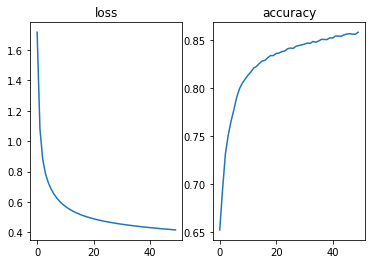

In [ ]:
plt.subplot(121)
plt.title("loss")
plt.plot(epoch_loss)

plt.subplot(122)
plt.title("accuracy")
plt.plot(epoch_acc)

In [ ]:
for i in model.parameters():
  print(i)
  break

Parameter containing:
tensor([[ 0.0242,  0.0078,  0.0204,  ...,  0.0019,  0.0318,  0.0043],
        [-0.0009, -0.0036,  0.0175,  ..., -0.0234, -0.0321, -0.0320],
        [ 0.0031, -0.0121,  0.0342,  ...,  0.0039, -0.0073, -0.0086],
        ...,
        [ 0.0038, -0.0322, -0.0163,  ...,  0.0180, -0.0208,  0.0056],
        [ 0.0101, -0.0001,  0.0119,  ..., -0.0212, -0.0114,  0.0294],
        [ 0.0043, -0.0057, -0.0284,  ...,  0.0180,  0.0306,  0.0006]],
       device='cuda:0', requires_grad=True)


couldn't find much difference, infact it performed little worse than unscaled dataset

In [ ]:
# training it for less epochs for better understanding the scaling factor

In [ ]:
# unscaled

model, optimizer, loss_fun = essentials()

dloader = dataloader()

epoch_loss, epoch_acc = [], []
for _ in range(5):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

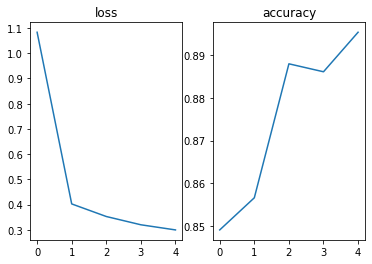

In [ ]:
plt.subplot(121)
plt.title("loss")
plt.plot(epoch_loss)

plt.subplot(122)
plt.title("accuracy")
plt.plot(epoch_acc)

In [ ]:
# checking the weight values for unsclaed dataset 
for i in model.parameters():
  print(torch.max(i))
  break

tensor(0.0670, device='cuda:0', grad_fn=<MaxBackward1>)


Batch_size parameter 

lower batch_size means more updates/epoch on weights and the gradients path flow is noisy thus it takes more updates to converge.

advantage: computationally feasible
disadvantage: takes time to converge


more batch_size means less updates/epoch on weights and gradients path is less noisy towards minima and thus takes less updates to converge 

advantage: takes less time to converge
disadvantage: computationally expensive, ( to update weights once, lot of computations has to be made)

best options : 
medium batch_size ( 23,64,128 .. ) and momentum based optimizations ( SGD+momentum, NAG, Adam etc) 


In [ ]:
# batch_size =1000, lr=0.001, scaled, epochs=5     (expectency is that acc should be avg)

In [20]:
# downloading evaluation data 
test_fashion = torchvision.datasets.FashionMNIST("/data/fashion", train=False, download=True )

In [21]:
test_images = test_fashion.data
test_labels = test_fashion.targets

In [22]:
test_images.shape 

torch.Size([10000, 28, 28])

In [23]:
test_data = Fashiondata(test_images, test_labels)
test_dloader = DataLoader(test_data, batch_size=len(test_images), shuffle=True)

In [24]:
# function for getting loss for test data 

@torch.no_grad()
def test_loss(model,x,y,loss_fun):
  pred = model(x)
  loss = loss_fun(pred,y)
  return loss.item()

In [22]:

model, optimizer, loss_fun = essentials()

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in range(50):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

  for x, y in test_dloader:
    test_epoch_loss.append(test_loss(model, x, y, loss_fun))
    val = evaluation(model,x,y)
    test_epoch_acc.append(np.mean(val))



TypeError: ignored

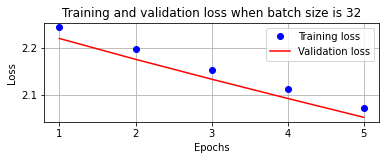

In [ ]:
# plotting graphs 
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()




# plt.subplots(212)
# plt.plot(range(5), epoch_loss, 'r', label="Train_loss")
# plt.plot(range(5), test_epoch_loss, label="Test_loss")
# plt.xlabel("Epoch")
# plt.legend()

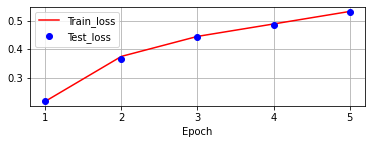

In [ ]:
plt.subplot(211)
plt.plot(epochs, epoch_acc, 'r', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

# %matplotlib inline
# plt.subplot(211)
# plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
# plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.title('Training and validation loss when batch size is 32')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid('off')
# plt.show()




In [ ]:
# batch_size =1000, lr=0.001, scaled, epochs=50   ( expectenxy is that , acc should be around 85)

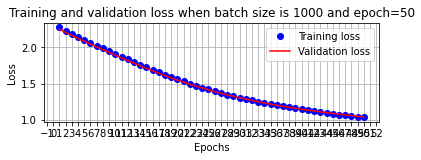

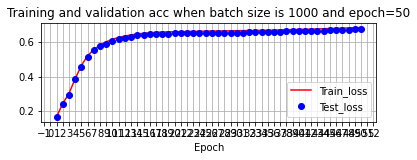

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 1000 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 1000 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

it didn't reach expected result, may be because since batc_size = 1000 , it was only 3000 times weight updates which was not enough. Even if we had increased epochs to increase times weight updates, graph shows acc wouldn't have improved much. 

In [ ]:
# lets try the same aboove experiment with Adam optimizer. This time it has to perform better atleast a little.

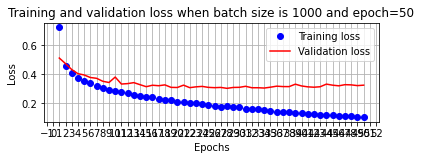

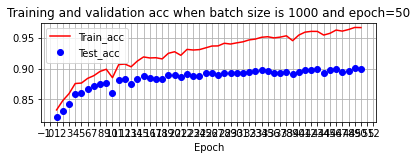

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 1000 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train_acc")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 1000 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

it worked as more than expected.

so, basically models with fixed batch_size ( specially medium sizes like 32 to <500 ) ones should always perform better when normal optmizer is replaced with momentum based ones 


In [ ]:
# trying for different optimizations techniques ( with and without momentum ) for fixed batch_size ( 32 ), Expectency is that Adam one shoud perform better

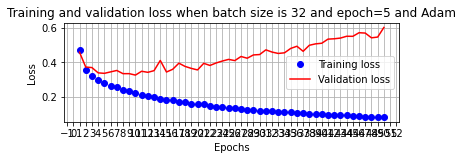

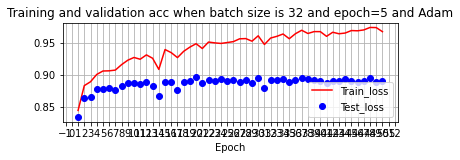

In [ ]:
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=5 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=5 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

It's little overfitting 

In [ ]:
# training with same mode but with more batch_size (300), Same Adam is expected to perform better

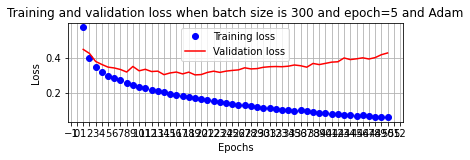

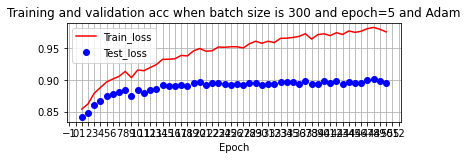

In [ ]:
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 300 and epoch=5 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 300 and epoch=5 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

its overfitting as well


In [ ]:
from tqdm import tqdm

In [ ]:
# trying with multiple batch_sizes and combined with SGD and Adam optmizers for final checking of behaviour of batch_size along with optimizers

In [ ]:
def dataloadr():                                           # function for returning the dataloder
  fdata = Fashiondata(images,labels)
  dloader = DataLoader(fdata, batch_size=64, shuffle=True)
  return dloader

In [ ]:
batch_sizes = [32,64,128,500,1000,10000]
train_acc_dict = {}
test_acc_dict = {}
train_loss_dict = {}
test_loss_dict = {}

for size in tqdm(batch_sizes):
  model, optimizer, loss_fun = essentials()
  dloader = dataloadr(size)

  epoch_loss, epoch_acc = [], []
  test_epoch_loss, test_epoch_acc = [], []
  for _ in range(50):
    epoch_losses, epoch_accuracies = [], [] 
    for x,y in dloader:
      los = train_batch(x, y, model, optimizer, loss_fun)
      epoch_losses.append(los)
    epoch_loss.append(np.mean(epoch_losses))
    for x,y in dloader:
      val = evaluation(model,x,y)  
      epoch_accuracies.append(np.mean(val)) 
    epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

    for x, y in test_dloader:
      test_epoch_loss.append(test_loss(model, x, y, loss_fun))
      val = evaluation(model,x,y)
      test_epoch_acc.append(np.mean(val))
  train_acc_dict[size] =  epoch_acc      
  train_loss_dict[size] = epoch_loss
  test_acc_dict[size] = test_epoch_acc
  test_loss_dict[size] = test_epoch_loss


100%|██████████| 6/6 [47:39<00:00, 476.57s/it]


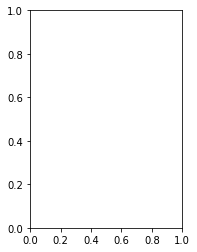

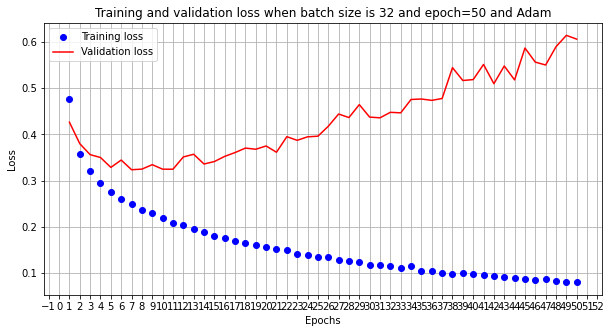

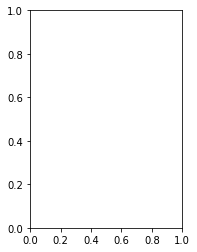

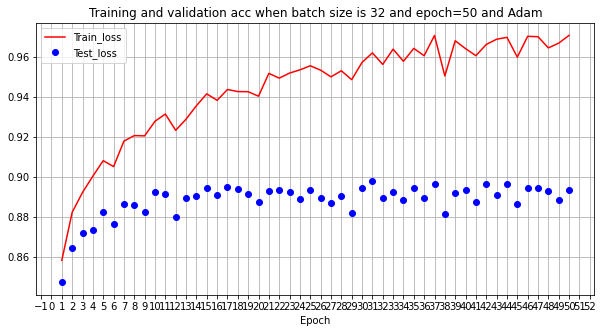

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[32], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[32], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[32], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[32], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

model overfittted for 32 batch size

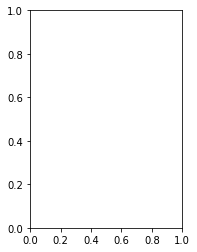

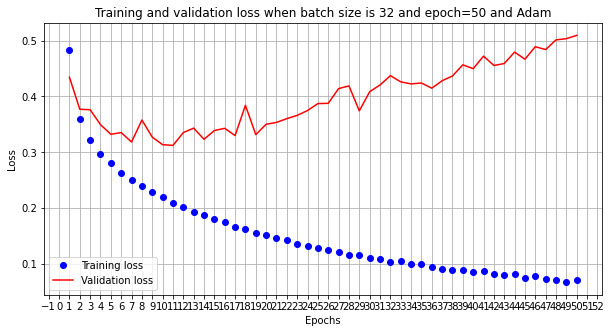

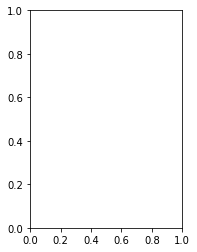

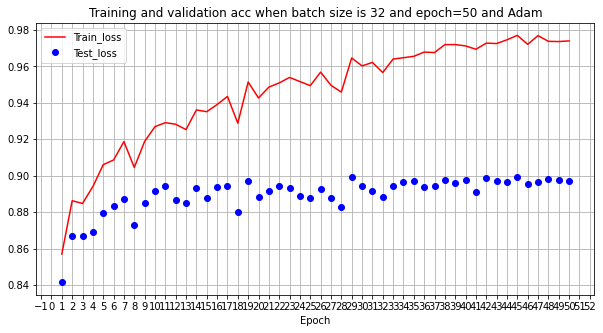

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[64], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[64], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[64], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[64], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

same result

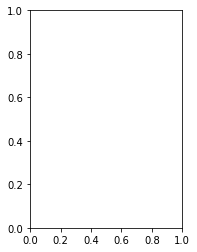

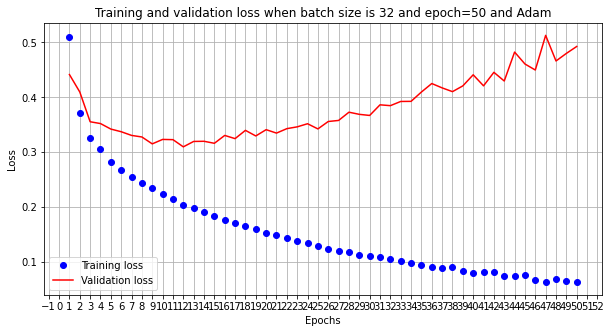

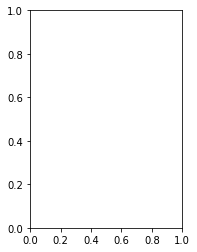

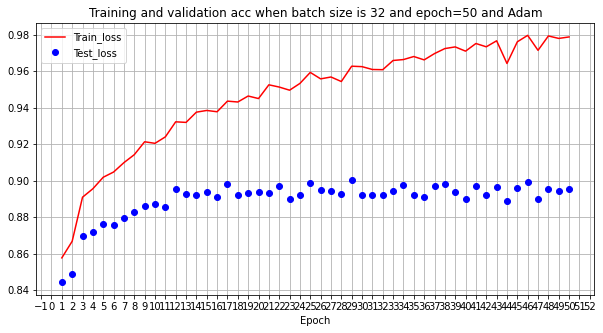

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[128], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[128], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[128], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[128], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

again overfitting 

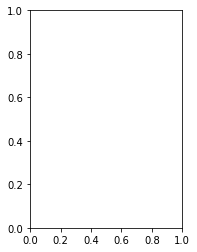

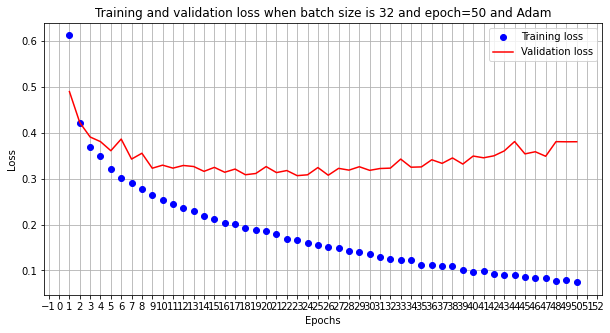

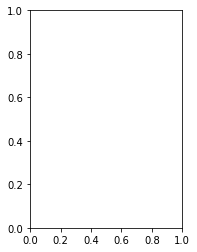

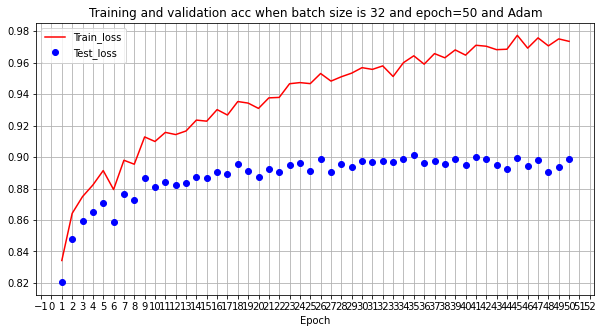

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[500], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[500], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[500], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[500], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

validatiob loss has improved, but the model is still overfitting

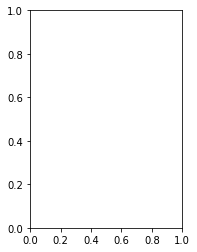

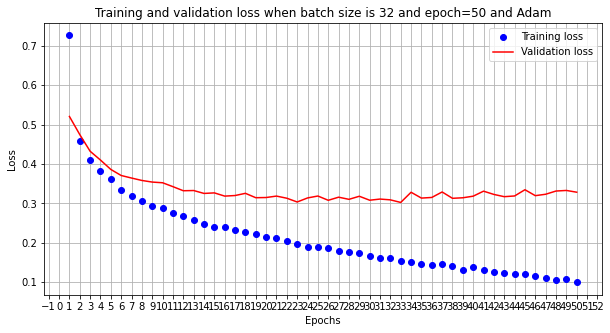

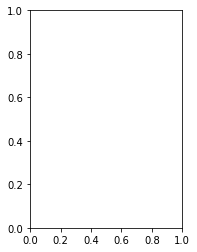

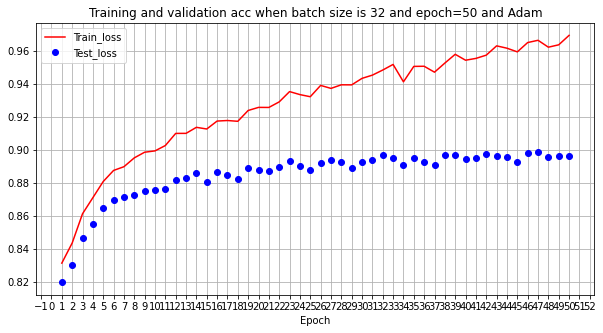

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[1000], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[1000], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[1000], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[1000], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

model validation loss has improved again, but still model is still overfitting 

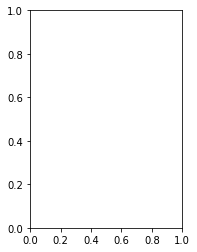

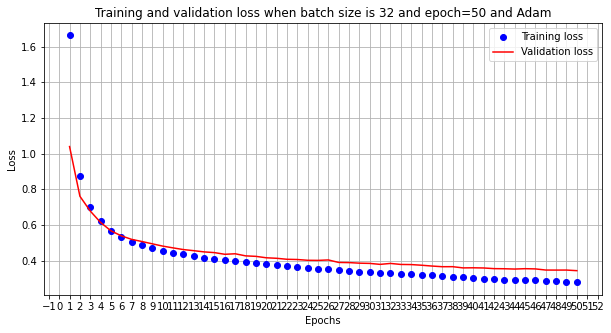

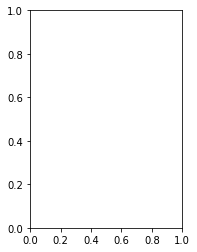

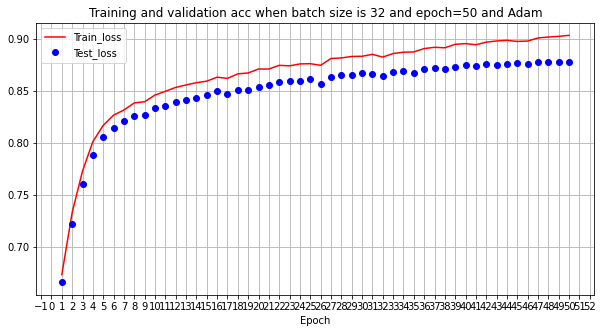

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[10000], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[10000], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[10000], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[10000], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

model validation loss is performing good, but if we see model fitting has decreased, this mostly is because of less number of weight updates .. 

#Impact of Learning rate 

In [ ]:
from tqdm import tqdm

In [ ]:
def dataloadr():                                           # function for returning the dataloder
  fdata = Fashiondata(images,labels)
  dloader = DataLoader(fdata, batch_size=64, shuffle=True)
  return dloader

In [ ]:
learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_acc_dict = {}
test_acc_dict = {}
train_loss_dict = {}
test_loss_dict = {}
weight_distributions = {}

dloader = dataloadr()

for lr in tqdm(learning_rate):
  model, optimizer, loss_fun = essentials(lr)

  epoch_loss, epoch_acc = [], []
  test_epoch_loss, test_epoch_acc = [], []
  for _ in range(50):
    epoch_losses, epoch_accuracies = [], [] 
    for x,y in dloader:
      los = train_batch(x, y, model, optimizer, loss_fun)
      epoch_losses.append(los)
    epoch_loss.append(np.mean(epoch_losses))
    for x,y in dloader:
      val = evaluation(model,x,y)  
      epoch_accuracies.append(np.mean(val)) 
    epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

    for x, y in test_dloader:
      test_epoch_loss.append(test_loss(model, x, y, loss_fun))
      val = evaluation(model,x,y)
      test_epoch_acc.append(np.mean(val))
  train_acc_dict[lr] =  epoch_acc      
  train_loss_dict[lr] = epoch_loss
  test_acc_dict[lr] = test_epoch_acc
  test_loss_dict[lr] = test_epoch_loss
  weight_distributions[lr] = model.parameters()


100%|██████████| 6/6 [50:30<00:00, 505.07s/it]


In [ ]:
# expectency is the for high learning rate that is 0.1 and 0.01 the models wont converge and for the proper learning rate like 0.001 model should perform well ( but it will overfit because once it convergence to good extent, next is all the fight be
# between genneralizing and overfitting, and since after this point weight updates that happens on this medium learning rate because of the loss will be memorizing test data i.e, overfit rather than learning more, thus its important to reduce lr from this point on)

# for lr 0.0001 0.00001 and even less, it will take less time to converge, as the weight updates happening will be very small. and also the chance of overfitting in them is less 

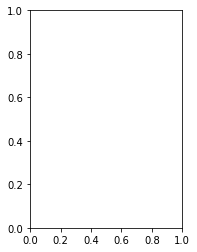

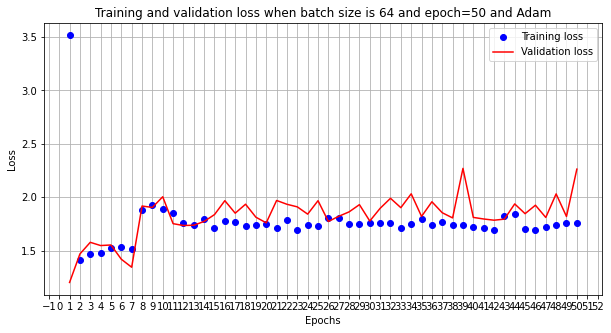

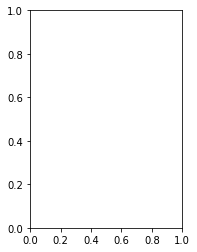

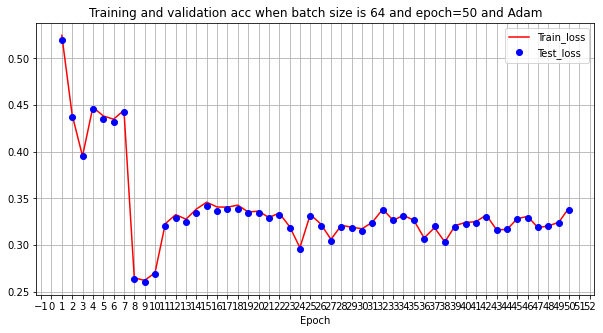

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[0.1], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[0.1], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 64 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[0.1], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[0.1], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 64 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

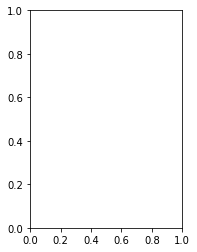

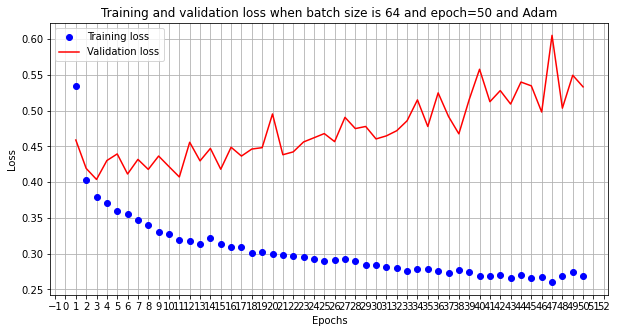

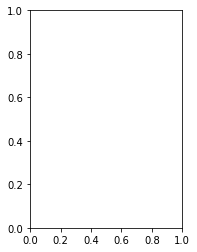

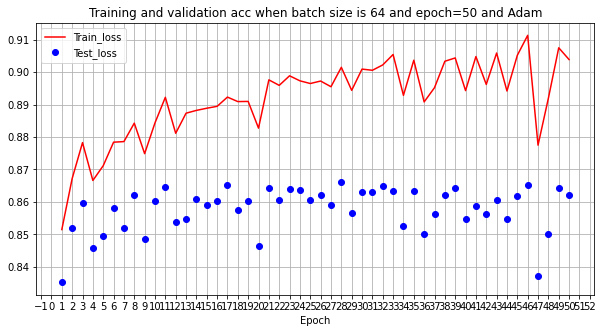

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[0.01], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[0.01], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 64 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[0.01], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[0.01], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 64 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

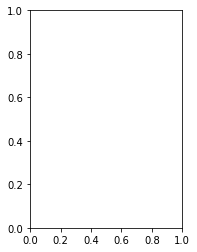

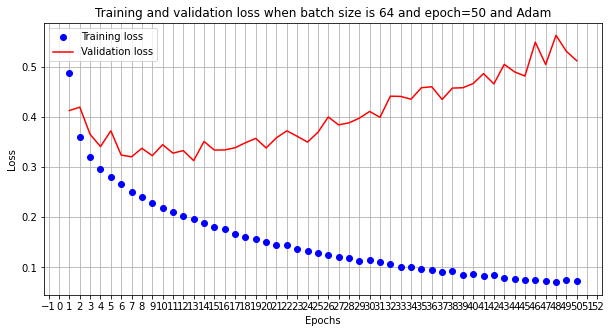

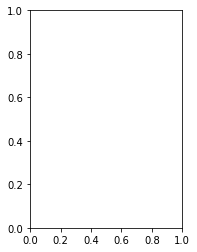

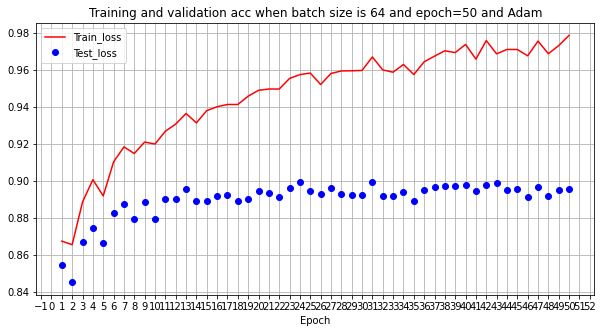

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[0.001], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[0.001], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 64 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[0.001], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[0.001], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 64 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

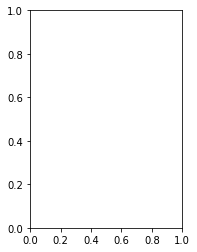

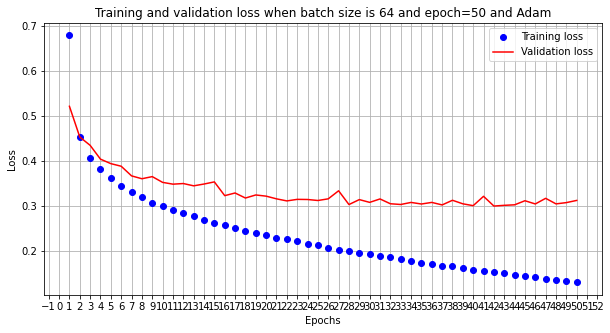

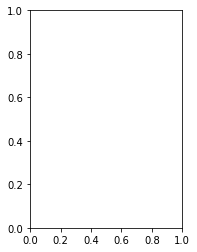

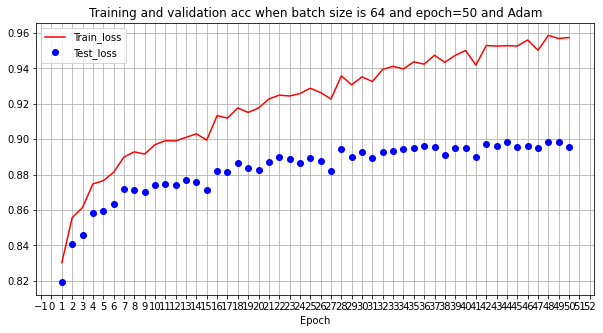

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[0.0001], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[0.0001], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 64 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[0.0001], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[0.0001], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 64 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

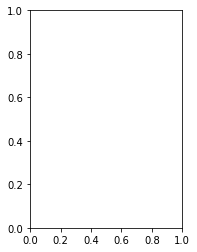

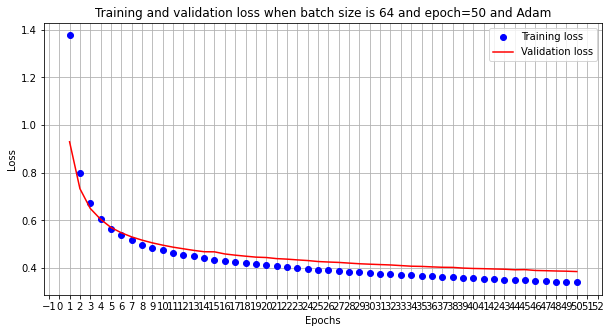

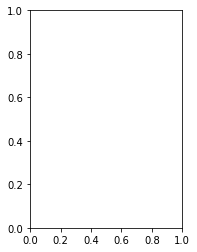

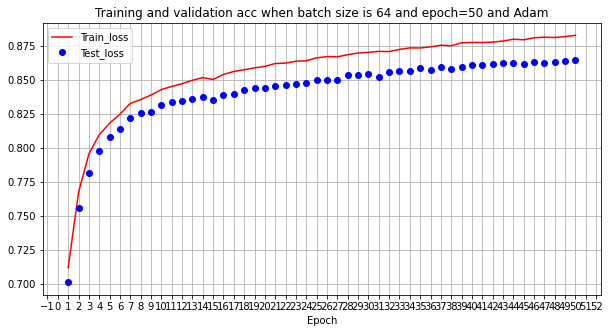

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[0.00001], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[0.00001], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 64 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[0.00001], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[0.00001], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 64 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

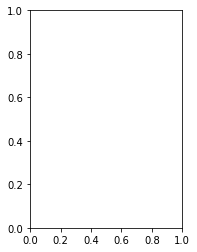

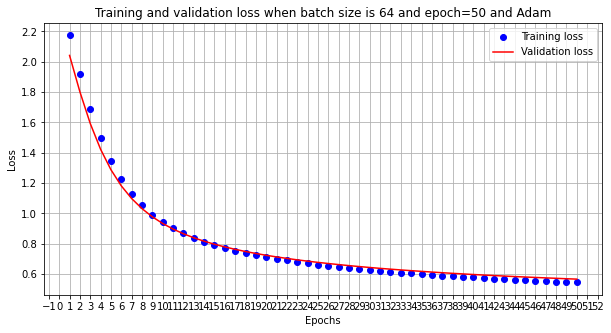

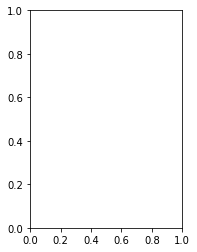

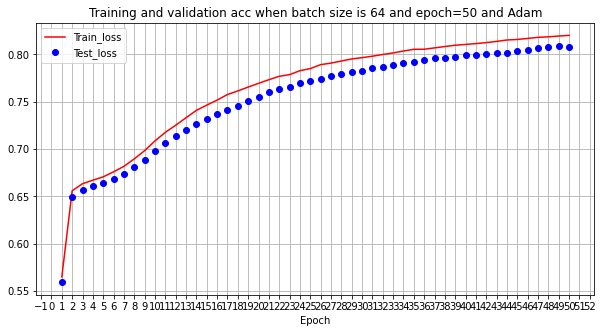

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(121)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_dict[0.000001], 'bo', label='Training loss')
plt.plot(epochs, test_loss_dict[0.000001], 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 64 and epoch=50 and Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(122)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc_dict[0.000001], 'r', label="Train_loss")
plt.plot(epochs, test_acc_dict[0.000001], 'bo', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 64 and epoch=50 and Adam')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

Crazy all the results are as expected

In [ ]:
# try with medium batch_size along with ReduceLROnPleateau, Ideally this has to converge ( if not with 95+ accuracy atleast <95 and >90) and generalize well. 

In [ ]:
model, optimizer, loss_fun =  essentials(0.001)

In [ ]:
lr_schedule  = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=4, min_lr=0.000001, verbose=True)

In [ ]:
# ideally this has to perform better than previous observation under similar batch_size

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in range(50):
    epoch_losses, epoch_accuracies = [], [] 
    for x,y in dloader:
      los = train_batch(x, y, model, optimizer, loss_fun)
      epoch_losses.append(los)
    epoch_loss.append(np.mean(epoch_losses))
    for x,y in dloader:
      val = evaluation(model,x,y)  
      epoch_accuracies.append(np.mean(val)) 
    epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

    for x, y in test_dloader:
      loss = test_loss(model, x, y, loss_fun)
      test_epoch_loss.append(loss)
      val = evaluation(model,x,y)
      test_epoch_acc.append(np.mean(val))
      lr_schedule.step(loss)

Epoch    17: reducing learning rate of group 0 to 5.0000e-04.
Epoch    22: reducing learning rate of group 0 to 2.5000e-04.
Epoch    27: reducing learning rate of group 0 to 1.2500e-04.
Epoch    32: reducing learning rate of group 0 to 6.2500e-05.
Epoch    37: reducing learning rate of group 0 to 3.1250e-05.
Epoch    42: reducing learning rate of group 0 to 1.5625e-05.
Epoch    47: reducing learning rate of group 0 to 7.8125e-06.


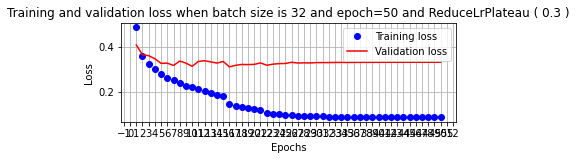

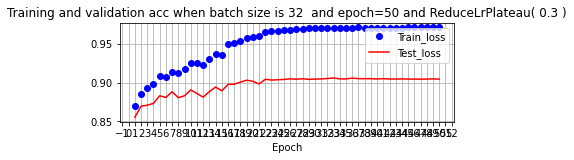

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50 and ReduceLrPlateau ( 0.3 )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'bo', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'r', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32  and epoch=50 and ReduceLrPlateau( 0.3 )')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

campared to the prevous 32 batch non-lr_schedule , overfitting has reduced a little. 

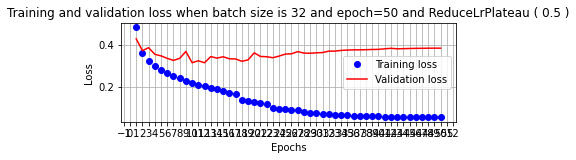

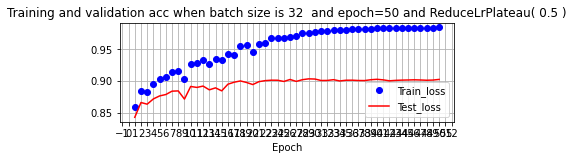

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50 and ReduceLrPlateau ( 0.5 )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'bo', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'r', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32  and epoch=50 and ReduceLrPlateau( 0.5 )')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

not much of a difference on 0.1 and 0.5 reduction in lr_scheduler

In [ ]:
# try with batch_size of 10000 along with more epochs say 250 and use ReduceLROnPlateau, Ideally it has to generalize well and accuracy should be 95+. 

In [ ]:
model, optimizer, loss_fun =  essentials(0.001)

In [ ]:
lr_schedule  = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=4, min_lr=0.000001, verbose=True)

In [ ]:
# ideally this has to perform better than previous observation under similar batch_size

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in range(250):
    epoch_losses, epoch_accuracies = [], [] 
    for x,y in dloader:
      los = train_batch(x, y, model, optimizer, loss_fun)
      epoch_losses.append(los)
    epoch_loss.append(np.mean(epoch_losses))
    for x,y in dloader:
      val = evaluation(model,x,y)  
      epoch_accuracies.append(np.mean(val)) 
    epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

    for x, y in test_dloader:
      loss = test_loss(model, x, y, loss_fun)
      test_epoch_loss.append(loss)
      val = evaluation(model,x,y)
      test_epoch_acc.append(np.mean(val))
      lr_schedule.step(loss)

Epoch   113: reducing learning rate of group 0 to 5.0000e-04.
Epoch   118: reducing learning rate of group 0 to 2.5000e-04.
Epoch   125: reducing learning rate of group 0 to 1.2500e-04.
Epoch   151: reducing learning rate of group 0 to 6.2500e-05.
Epoch   161: reducing learning rate of group 0 to 3.1250e-05.
Epoch   166: reducing learning rate of group 0 to 1.5625e-05.
Epoch   171: reducing learning rate of group 0 to 7.8125e-06.
Epoch   176: reducing learning rate of group 0 to 3.9063e-06.
Epoch   181: reducing learning rate of group 0 to 1.9531e-06.
Epoch   186: reducing learning rate of group 0 to 1.0000e-06.


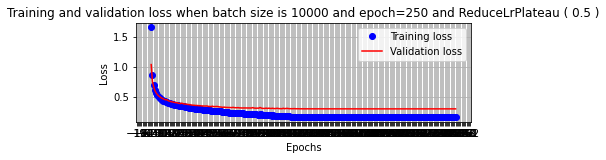

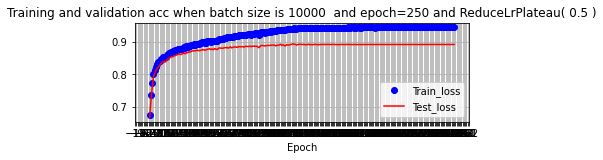

In [ ]:
%matplotlib inline
epochs = np.arange(250)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 10000 and epoch=250 and ReduceLrPlateau ( 0.5 )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'bo', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'r', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 10000  and epoch=250 and ReduceLrPlateau( 0.5 )')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

The results are very similar to previous ones 

In [ ]:
# checking for unscaled and scaled data along with learning data, to check the impact. and based on result we can conclude whether batchnormalizing the data is hlpful
# in increasing the learning rate. Basically scaled data with 0.01 should perform better than unscaled data with 0.01 

In [ ]:
model, optimizer, loss_fun = essentials(0.01)

In [ ]:

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(50)):
    epoch_losses, epoch_accuracies = [], [] 
    for x,y in dloader:
      los = train_batch(x, y, model, optimizer, loss_fun)
      epoch_losses.append(los)
    epoch_loss.append(np.mean(epoch_losses))
    for x,y in dloader:
      val = evaluation(model,x,y)  
      epoch_accuracies.append(np.mean(val)) 
    epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

    for x, y in test_dloader:
      loss = test_loss(model, x, y, loss_fun)
      test_epoch_loss.append(loss)
      val = evaluation(model,x,y)
      test_epoch_acc.append(np.mean(val))
      #lr_schedule.step(loss)

100%|██████████| 50/50 [11:29<00:00, 13.79s/it]


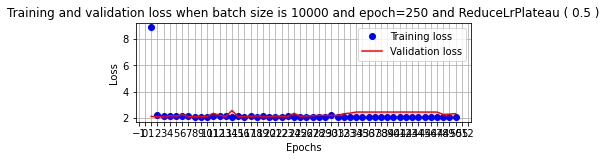

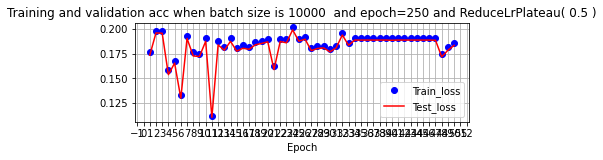

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 10000 and epoch=250 and ReduceLrPlateau ( 0.5 )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'bo', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'r', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 10000  and epoch=250 and ReduceLrPlateau( 0.5 )')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

In [ ]:

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(50)):
    epoch_losses, epoch_accuracies = [], [] 
    for x,y in dloader:
      los = train_batch(x, y, model, optimizer, loss_fun)
      epoch_losses.append(los)
    epoch_loss.append(np.mean(epoch_losses))
    for x,y in dloader:
      val = evaluation(model,x,y)  
      epoch_accuracies.append(np.mean(val)) 
    epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

    for x, y in test_dloader:
      loss = test_loss(model, x, y, loss_fun)
      test_epoch_loss.append(loss)
      val = evaluation(model,x,y)
      test_epoch_acc.append(np.mean(val))
      #lr_schedule.step(loss)

100%|██████████| 50/50 [11:27<00:00, 13.75s/it]


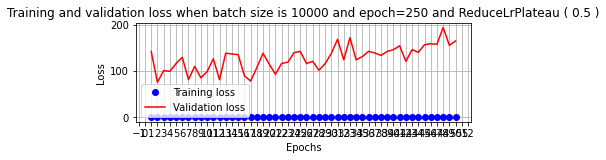

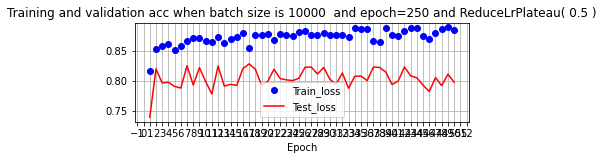

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 10000 and epoch=250 and ReduceLrPlateau ( 0.5 )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'bo', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'r', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 10000  and epoch=250 and ReduceLrPlateau( 0.5 )')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

we can clearly see that scaling the dataset does give advantage to increasing the learning rate 

# BatchNorm Layer 

The main use of Batch_norm layer is to be helpful in trainig the deeper networks, by avoiding internal covariance shift. that is to normalize inputs to the hidden layers. And sicne we are scaling the inputs it also gives flwxibality in increasing the learning rate 

In [ ]:
# experiment is first bulding the deep network first and checking its performance, and next adding batch norm layer to network ( ideally this had to converge faster and little better)

In [ ]:
# class for defining deep model

class multi_layer_model(nn.Module):
  def __init__(self):
    super().__init__(),
    self.model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000,2000),
        nn.ReLU(),
        nn.Linear(2000,1000),
        nn.ReLU(),
        nn.Linear(1000,500),
        nn.ReLU(),
        nn.Linear(500,10)
        ).to(device)
  def forward(self, x):
    return self.model(x)      

In [ ]:
model = multi_layer_model()

In [ ]:
model(fdata[0][0])

tensor([-0.0255,  0.0052,  0.0066,  0.0322,  0.0473,  0.0532,  0.0188,  0.0176,
         0.0438,  0.0288], device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
# using Adam Optimizer 
optimizer = optim.Adam(model.parameters(), lr=0.001)    

In [ ]:
loss_fun = nn.CrossEntropyLoss()

In [ ]:
for x,y in dloader:
  los = train_batch(x, y, model, optimizer, loss_fun)
  break
print(los)  

2.301396131515503


In [ ]:
epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(50)):
    epoch_losses, epoch_accuracies = [], [] 
    for x,y in dloader:
      los = train_batch(x, y, model, optimizer, loss_fun)
      epoch_losses.append(los)
    epoch_loss.append(np.mean(epoch_losses))
    for x,y in dloader:
      val = evaluation(model,x,y)  
      epoch_accuracies.append(np.mean(val)) 
    epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

    for x, y in test_dloader:
      loss = test_loss(model, x, y, loss_fun)
      test_epoch_loss.append(loss)
      val = evaluation(model,x,y)
      test_epoch_acc.append(np.mean(val))
      #lr_schedule.step(loss)

100%|██████████| 50/50 [18:51<00:00, 22.64s/it]


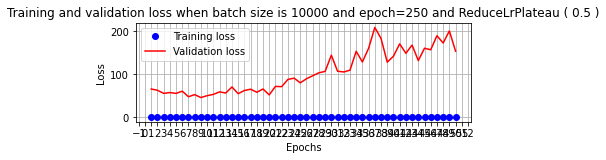

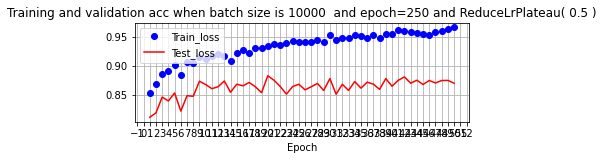

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 10000 and epoch=250 and ReduceLrPlateau ( 0.5 )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'bo', label="Train_loss")
plt.plot(epochs, test_epoch_acc, 'r', label="Test_loss")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 10000  and epoch=250 and ReduceLrPlateau( 0.5 )')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

In [ ]:
# class for defining deep model

class multi_layer_model_BN(nn.Module):
  def __init__(self):
    super().__init__(),
    self.model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000,2000),
        nn.ReLU(),
        nn.Linear(2000,1000),
        nn.ReLU(),
        # nn.BatchNorm1d(1000),
        nn.Linear(1000,500),
        nn.ReLU(),
        nn.BatchNorm1d(500),
        nn.Linear(500,10)
        ).to(device)
  def forward(self, x):
    return self.model(x)      

In [ ]:
model = multi_layer_model_BN()
optimizer = optim.Adam(model.parameters(), lr=0.001)    
loss_fun = nn.CrossEntropyLoss()

In [ ]:
for i in model.parameters():
  print(i.shape)

torch.Size([1000, 784])
torch.Size([1000])
torch.Size([2000, 1000])
torch.Size([2000])
torch.Size([1000, 2000])
torch.Size([1000])
torch.Size([500, 1000])
torch.Size([500])
torch.Size([500])
torch.Size([500])
torch.Size([10, 500])
torch.Size([10])


In [ ]:
for x,y in dloader:
  los = train_batch(x, y, model, optimizer, loss_fun)
  break
print(los)  

2.402223587036133


In [ ]:
epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(50)):
    epoch_losses, epoch_accuracies = [], [] 
    for x,y in dloader:
      los = train_batch(x, y, model, optimizer, loss_fun)
      epoch_losses.append(los)
    epoch_loss.append(np.mean(epoch_losses))
    for x,y in dloader:
      val = evaluation(model,x,y)  
      epoch_accuracies.append(np.mean(val)) 
    epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

    for x, y in test_dloader:
      loss = test_loss(model, x, y, loss_fun)
      test_epoch_loss.append(loss)
      val = evaluation(model,x,y)
      test_epoch_acc.append(np.mean(val))
      #lr_schedule.step(loss)

 36%|███▌      | 18/50 [1:27:54<2:35:14, 291.07s/it]

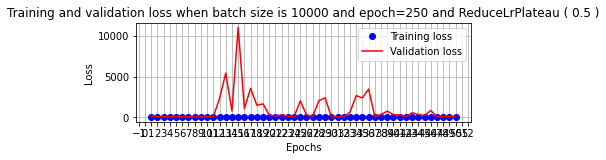

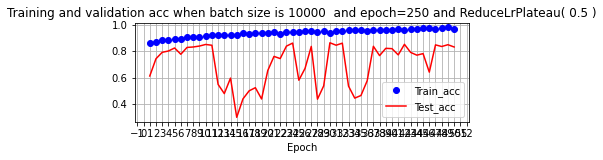

In [ ]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 10000 and epoch=250 and ReduceLrPlateau ( 0.5 )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'bo', label="Train_acc")
plt.plot(epochs, test_epoch_acc, 'r', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 10000  and epoch=250 and ReduceLrPlateau( 0.5 )')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

# checking for distribution of weights and inputs

### 1. for less convergence

In [46]:
model = nn.Sequential(
    nn.Linear(28*28, 1500),
    nn.ReLU(),
    nn.BatchNorm1d(1500),
    nn.Linear(1500, 1000),
    nn.ReLU(),
    nn.BatchNorm1d(1000),
    nn.Linear(1000, 500),
    nn.ReLU(),
    nn.Linear(500,10)
).to(device)

In [47]:
optimizer = optim.Adam(model.parameters(), lr=0.001,  weight_decay=1e-4)

In [48]:
loss_fun = nn.CrossEntropyLoss()

In [49]:
for x,y in iter(dloader):
  pred = model(x)
  print(pred.shape)
  print(y.shape)
  loss = loss_fun(pred,y)
  print(loss)
  break

torch.Size([250, 10])
torch.Size([250])
tensor(2.3252, device='cuda:0', grad_fn=<NllLossBackward>)


In [32]:

#model, optimizer, loss_fun = essentials()

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(50)):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

  for x, y in test_dloader:
    test_epoch_loss.append(test_loss(model, x, y, loss_fun))
    val = evaluation(model,x,y)
    test_epoch_acc.append(np.mean(val))



100%|██████████| 50/50 [10:08<00:00, 12.17s/it]


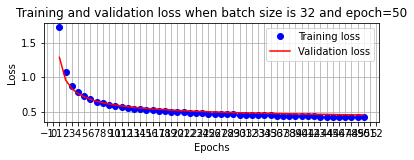

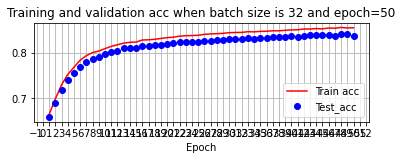

In [34]:
%matplotlib inline
epochs = np.arange(50)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train acc")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

Accuracy is close to 85 that is when the convergence is not much

In [ ]:
# distribution of weights 

 Distribution of 0.weight 


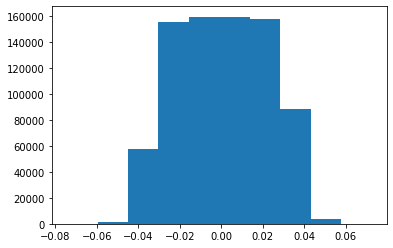

 Distribution of 0.bias 


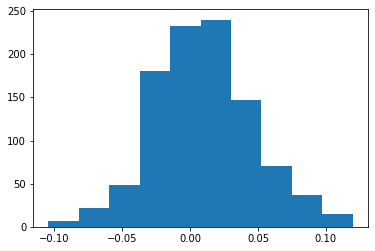

 Distribution of 2.weight 


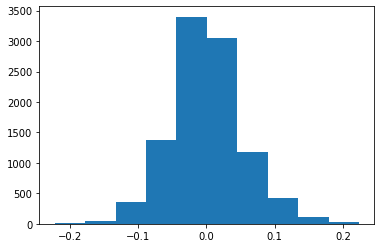

 Distribution of 2.bias 


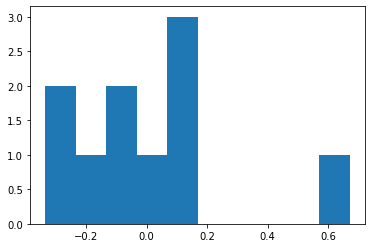

In [36]:
plot_distribution(model.named_parameters())

In [37]:
# distribution of inputs from the first layer

In [39]:
for x,y in dloader:
  val=model[0](x)
  print(val.shape)
  break

torch.Size([32, 1000])


In [43]:
val[0].shape

torch.Size([1000])

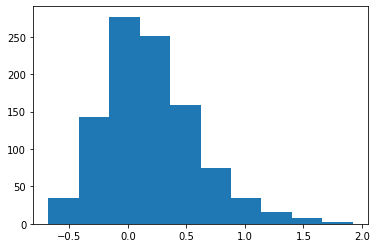

In [44]:
plt.hist(val[0].cpu().detach().numpy().flatten())
plt.show()

# Observation: 
we can see that the distribution of inputs are between -0.5 to 1.5 which is not too less and not too large either. which we can consider it as proper distribution. 
For the distribution of first layer inputs which are 0 to 1 (standardized). the corresponding weight distribution is -0.06 to 0.06. Since the values of these distribution is in very small range we can consider it to be proper ( because if the distrubution of weights has large range, it may be overfitting. Thus lesser the weight distribution better the learning ). 
For the distribution of the second layer inputs we saw it's between -0.5 to 1.5, which we thought was proper. and the distribution of weights for the corresponding layer is between -0.2 to 0.2, which is little higher than campared to previous layer . 


In [45]:
# increasing the batch_size, epoch and changing to momentum based Adam for better learning  

In [51]:

#model, optimizer, loss_fun = essentials()

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(250)):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

  for x, y in test_dloader:
    test_epoch_loss.append(test_loss(model, x, y, loss_fun))
    val = evaluation(model,x,y)
    test_epoch_acc.append(np.mean(val))



100%|██████████| 250/250 [37:42<00:00,  9.05s/it]


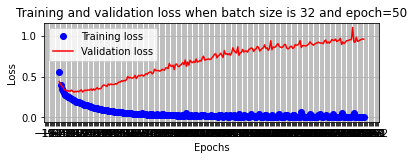

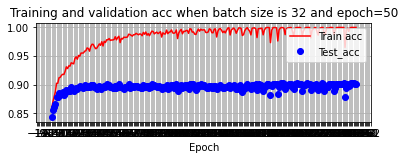

In [53]:
%matplotlib inline
epochs = np.arange(250)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train acc")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

As expected the model converged better.. but it's overfitting

# Distribution of the converged yet overfitted model 

 Distribution of 0.weight 


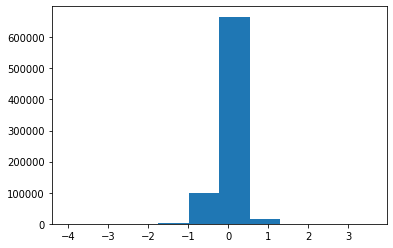

 Distribution of 0.bias 


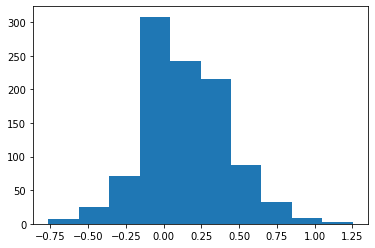

 Distribution of 2.weight 


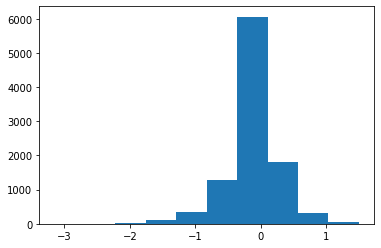

 Distribution of 2.bias 


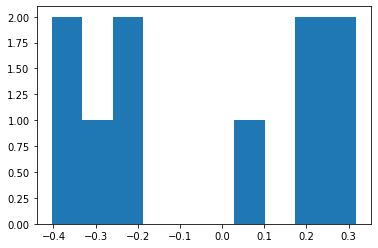

In [54]:
plot_distribution(model.named_parameters())

In [55]:
# 2nd layer input distributions 

In [56]:
for x,y in dloader:
  val=model[0](x)
  print(val.shape)
  break

torch.Size([250, 1000])


In [57]:
val[0].shape

torch.Size([1000])

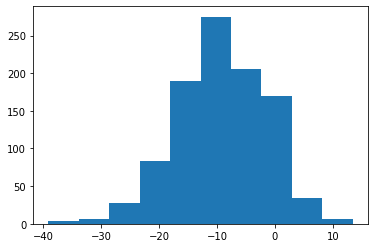

In [58]:
plt.hist(val[0].cpu().detach().numpy().flatten())
plt.show()

# observation :
we can see that Distribution of weights in both the layers have increased range campared to previous model. And also the distribution of inputs range from first layer has also increased ( -40 to 10 ). From which we can infer the fact that as the distribution of weights increases model starts to overfit. 
We can avoid this overfit by using ReduceLROnPlaeteau or Dropout or L1/L2 Regularization. 

In [ ]:
# using ReduceLROnPleateau to avoid overfit

In [50]:
lr_schedule  = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=4, min_lr=0.000001, verbose=True)

In [28]:

#model, optimizer, loss_fun = essentials()

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(250)):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

  for x, y in test_dloader:
    loss = test_loss(model, x, y, loss_fun)
    test_epoch_loss.append(test_loss(model, x, y, loss_fun))
    val = evaluation(model,x,y)
    test_epoch_acc.append(np.mean(val))
    lr_schedule.step(loss)




  7%|▋         | 18/250 [01:29<18:45,  4.85s/it]

Epoch    18: reducing learning rate of group 0 to 5.0000e-04.


 10%|█         | 26/250 [02:08<18:20,  4.91s/it]

Epoch    26: reducing learning rate of group 0 to 2.5000e-04.


 12%|█▏        | 31/250 [02:32<17:37,  4.83s/it]

Epoch    31: reducing learning rate of group 0 to 1.2500e-04.


 14%|█▍        | 36/250 [02:57<17:28,  4.90s/it]

Epoch    36: reducing learning rate of group 0 to 6.2500e-05.


 16%|█▋        | 41/250 [03:21<16:58,  4.87s/it]

Epoch    41: reducing learning rate of group 0 to 3.1250e-05.


 18%|█▊        | 46/250 [03:46<16:25,  4.83s/it]

Epoch    46: reducing learning rate of group 0 to 1.5625e-05.


 20%|██        | 51/250 [04:10<16:06,  4.86s/it]

Epoch    51: reducing learning rate of group 0 to 7.8125e-06.


 22%|██▏       | 56/250 [04:34<15:49,  4.90s/it]

Epoch    56: reducing learning rate of group 0 to 3.9063e-06.


 24%|██▍       | 61/250 [04:59<15:18,  4.86s/it]

Epoch    61: reducing learning rate of group 0 to 1.9531e-06.


 26%|██▋       | 66/250 [05:23<14:45,  4.81s/it]

Epoch    66: reducing learning rate of group 0 to 1.0000e-06.


100%|██████████| 250/250 [20:17<00:00,  4.87s/it]


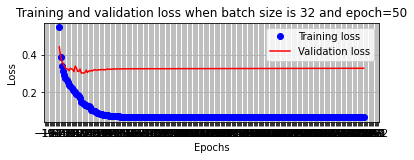

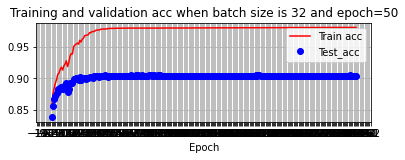

In [29]:
%matplotlib inline
epochs = np.arange(250)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train acc")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

In [30]:
# Distribution of weights

 Distribution of 0.weight 


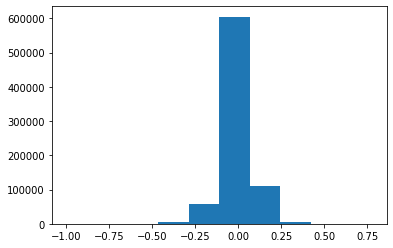

 Distribution of 0.bias 


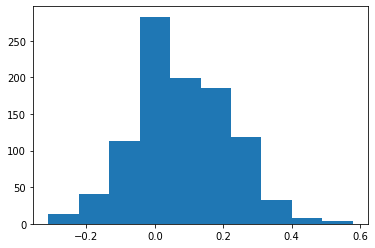

 Distribution of 2.weight 


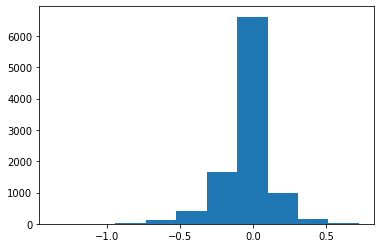

 Distribution of 2.bias 


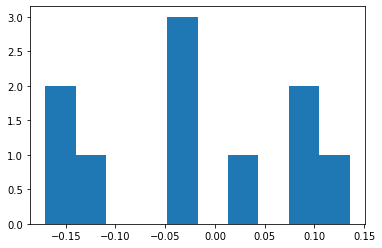

In [31]:
plot_distribution(model.named_parameters())

In [32]:
# distribution of 2nd layer inputs

In [33]:
for x,y in dloader:
  val=model[0](x)
  print(val.shape)
  break

torch.Size([250, 1000])


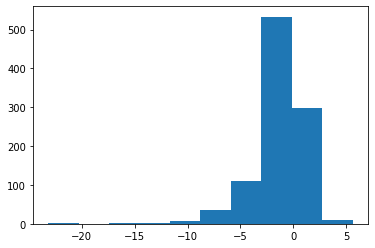

In [34]:
plt.hist(val[0].cpu().detach().numpy().flatten())
plt.show()

Even though models weights distribution range is reduced, same for 2nd layer inputs range.. model still overfits 

In [36]:
# Using Dropout + LRScheduler for better regularization

In [51]:

#model, optimizer, loss_fun = essentials()

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(250)):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

  for x, y in test_dloader:
    loss = test_loss(model, x, y, loss_fun)
    test_epoch_loss.append(test_loss(model, x, y, loss_fun))
    val = evaluation(model,x,y)
    test_epoch_acc.append(np.mean(val))
    lr_schedule.step(loss)




 12%|█▏        | 30/250 [02:26<17:45,  4.84s/it]

Epoch    30: reducing learning rate of group 0 to 5.0000e-04.


 14%|█▍        | 35/250 [02:50<17:28,  4.88s/it]

Epoch    35: reducing learning rate of group 0 to 2.5000e-04.


 16%|█▌        | 40/250 [03:14<17:10,  4.91s/it]

Epoch    40: reducing learning rate of group 0 to 1.2500e-04.


 18%|█▊        | 45/250 [03:39<16:38,  4.87s/it]

Epoch    45: reducing learning rate of group 0 to 6.2500e-05.


 20%|██        | 50/250 [04:03<16:22,  4.91s/it]

Epoch    50: reducing learning rate of group 0 to 3.1250e-05.


 22%|██▏       | 55/250 [04:27<15:45,  4.85s/it]

Epoch    55: reducing learning rate of group 0 to 1.5625e-05.


 24%|██▍       | 60/250 [04:52<15:26,  4.88s/it]

Epoch    60: reducing learning rate of group 0 to 7.8125e-06.


 26%|██▌       | 65/250 [05:16<14:56,  4.85s/it]

Epoch    65: reducing learning rate of group 0 to 3.9063e-06.


 28%|██▊       | 70/250 [05:41<14:38,  4.88s/it]

Epoch    70: reducing learning rate of group 0 to 1.9531e-06.


 30%|███       | 75/250 [06:05<14:12,  4.87s/it]

Epoch    75: reducing learning rate of group 0 to 1.0000e-06.


100%|██████████| 250/250 [20:16<00:00,  4.87s/it]


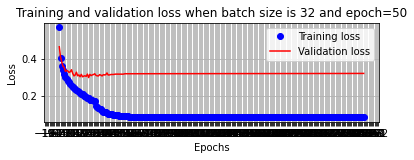

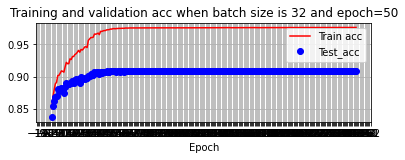

In [52]:
%matplotlib inline
epochs = np.arange(250)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train acc")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

overfitting reduced a little 

In [53]:
# Distribution of weights

 Distribution of 0.weight 


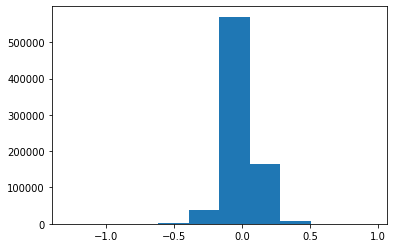

 Distribution of 0.bias 


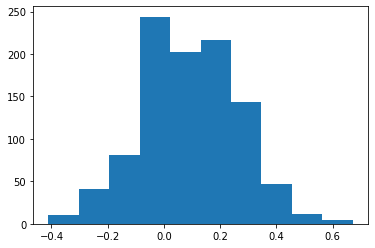

 Distribution of 3.weight 


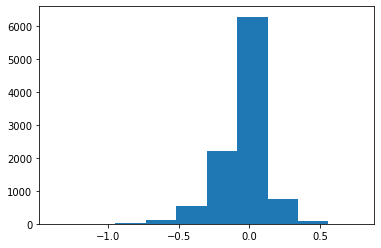

 Distribution of 3.bias 


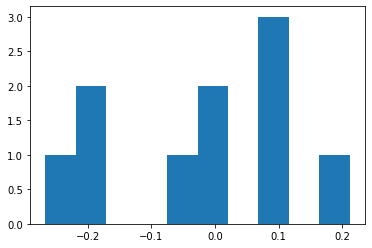

In [54]:
plot_distribution(model.named_parameters())

In [55]:
# distribution of 2nd layer

In [56]:
for x,y in dloader:
  val=model[0](x)
  print(val.shape)
  break

torch.Size([250, 1000])


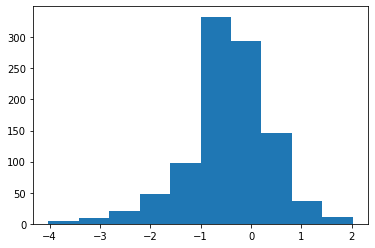

In [57]:
plt.hist(val[0].cpu().detach().numpy().flatten())
plt.show()

In [ ]:
# using Regularizer to weights so their distribution gets reduced ( this may hinder the convergence a bit ) 

In [79]:

#model, optimizer, loss_fun = essentials()

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(250)):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

  for x, y in test_dloader:
    loss = test_loss(model, x, y, loss_fun)
    test_epoch_loss.append(test_loss(model, x, y, loss_fun))
    val = evaluation(model,x,y)
    test_epoch_acc.append(np.mean(val))
    lr_schedule.step(loss)




 12%|█▏        | 31/250 [02:34<17:49,  4.88s/it]

Epoch    31: reducing learning rate of group 0 to 5.0000e-04.


 18%|█▊        | 45/250 [03:43<16:36,  4.86s/it]

Epoch    45: reducing learning rate of group 0 to 2.5000e-04.


 21%|██        | 53/250 [04:22<16:13,  4.94s/it]

Epoch    53: reducing learning rate of group 0 to 1.2500e-04.


 23%|██▎       | 58/250 [04:47<15:42,  4.91s/it]

Epoch    58: reducing learning rate of group 0 to 6.2500e-05.


 26%|██▌       | 64/250 [05:16<15:05,  4.87s/it]

Epoch    64: reducing learning rate of group 0 to 3.1250e-05.


 28%|██▊       | 69/250 [05:41<14:50,  4.92s/it]

Epoch    69: reducing learning rate of group 0 to 1.5625e-05.


 30%|██▉       | 74/250 [06:05<14:25,  4.92s/it]

Epoch    74: reducing learning rate of group 0 to 7.8125e-06.


 32%|███▏      | 79/250 [06:29<13:47,  4.84s/it]

Epoch    79: reducing learning rate of group 0 to 3.9063e-06.


 34%|███▎      | 84/250 [06:53<13:18,  4.81s/it]

Epoch    84: reducing learning rate of group 0 to 1.9531e-06.


 36%|███▌      | 89/250 [07:18<13:02,  4.86s/it]

Epoch    89: reducing learning rate of group 0 to 1.0000e-06.


100%|██████████| 250/250 [20:17<00:00,  4.87s/it]


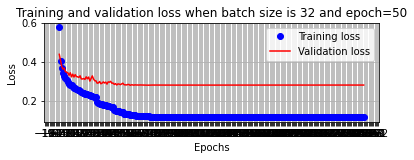

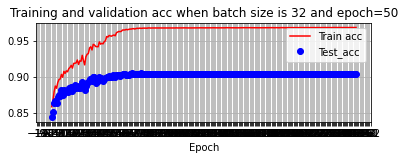

In [80]:
%matplotlib inline
epochs = np.arange(250)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train acc")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

 Distribution of 0.weight 


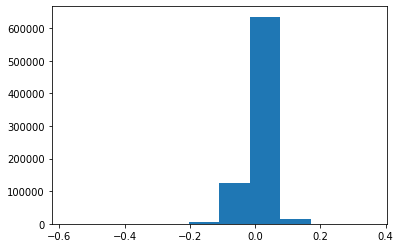

 Distribution of 0.bias 


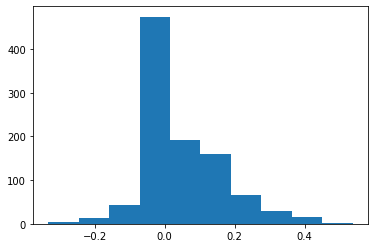

 Distribution of 3.weight 


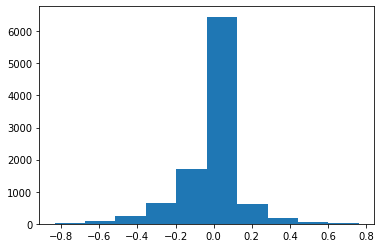

 Distribution of 3.bias 


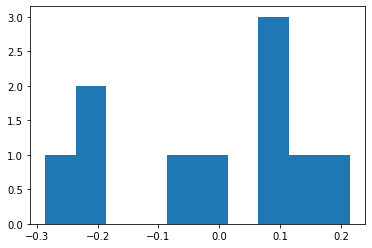

In [81]:
plot_distribution(model.named_parameters())

In [82]:
for x,y in dloader:
  val=model[0](x)
  print(val.shape)
  break

torch.Size([250, 1000])


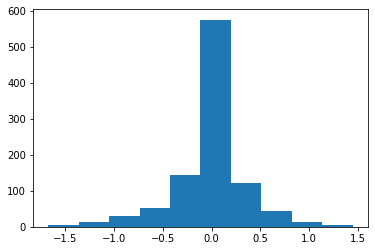

In [83]:
plt.hist(val[0].cpu().detach().numpy().flatten())
plt.show()

we can see that distribution of weights and inputs did get reduced but still overfitting is still there

In [ ]:
# scale the inputs to the range of (0 to 0.001) to get better idea on use of BatchNormalization, make the model multilayer use BN

In [ ]:
# without BatchNormalization

In [34]:

#model, optimizer, loss_fun = essentials()

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(250)):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

  # test data 
  for x, y in test_dloader:
    loss = test_loss(model, x, y, loss_fun)
    test_epoch_loss.append(test_loss(model, x, y, loss_fun))
    val = evaluation(model,x,y)
    test_epoch_acc.append(np.mean(val))
    lr_schedule.step(loss)




 17%|█▋        | 43/250 [03:49<17:52,  5.18s/it]

Epoch    43: reducing learning rate of group 0 to 5.0000e-04.


 23%|██▎       | 57/250 [05:02<16:32,  5.14s/it]

Epoch    57: reducing learning rate of group 0 to 2.5000e-04.


 30%|███       | 76/250 [06:42<15:15,  5.26s/it]

Epoch    76: reducing learning rate of group 0 to 1.2500e-04.


 38%|███▊      | 94/250 [08:15<13:27,  5.17s/it]

Epoch    94: reducing learning rate of group 0 to 6.2500e-05.


 43%|████▎     | 108/250 [09:28<12:16,  5.18s/it]

Epoch   108: reducing learning rate of group 0 to 3.1250e-05.


 52%|█████▏    | 129/250 [11:17<10:28,  5.19s/it]

Epoch   129: reducing learning rate of group 0 to 1.5625e-05.


 54%|█████▎    | 134/250 [11:43<10:03,  5.21s/it]

Epoch   134: reducing learning rate of group 0 to 7.8125e-06.


 59%|█████▉    | 147/250 [12:50<08:55,  5.20s/it]

Epoch   147: reducing learning rate of group 0 to 3.9063e-06.


 62%|██████▏   | 154/250 [13:26<08:19,  5.20s/it]

Epoch   154: reducing learning rate of group 0 to 1.9531e-06.


 64%|██████▎   | 159/250 [13:52<07:51,  5.19s/it]

Epoch   159: reducing learning rate of group 0 to 1.0000e-06.


100%|██████████| 250/250 [21:45<00:00,  5.22s/it]


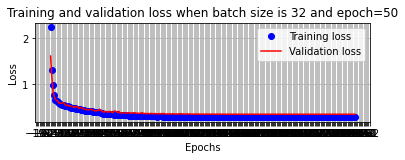

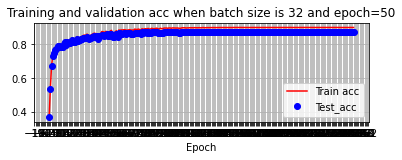

In [35]:
%matplotlib inline
epochs = np.arange(250)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train acc")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

In [36]:
# weight distribution 

 Distribution of 0.weight 


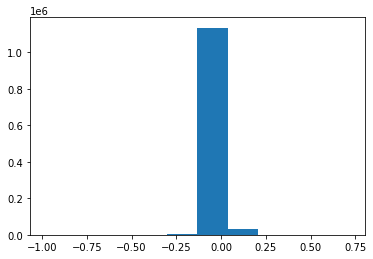

 Distribution of 0.bias 


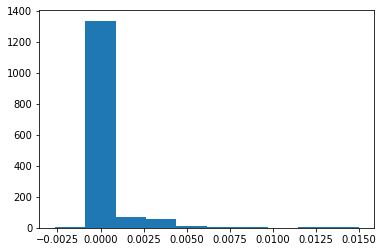

 Distribution of 2.weight 


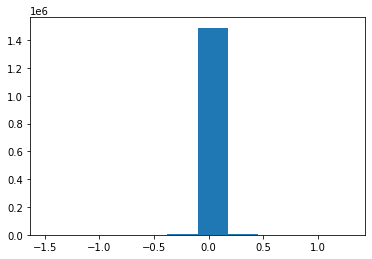

 Distribution of 2.bias 


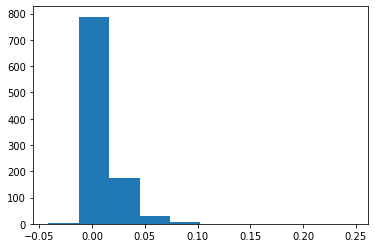

 Distribution of 4.weight 


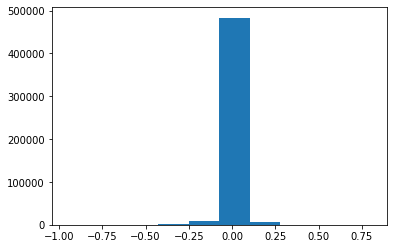

 Distribution of 4.bias 


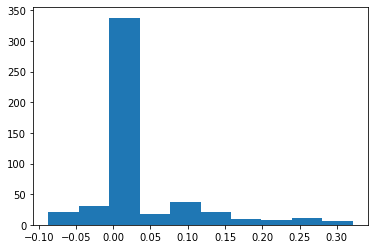

 Distribution of 6.weight 


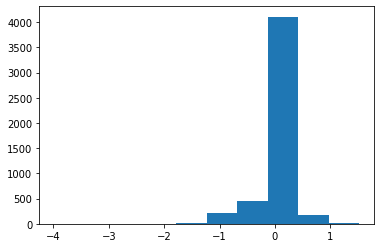

 Distribution of 6.bias 


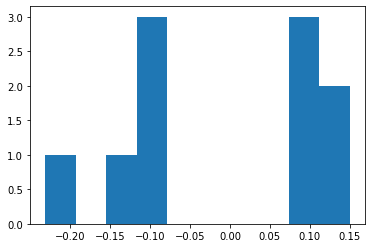

In [37]:
plot_distribution(model.named_parameters())

In [44]:
for x,y in dloader:
  val=model[3](x)
  print(val.shape)
  break

torch.Size([250, 784])


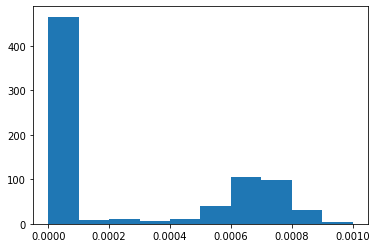

In [45]:
plt.hist(val[0].cpu().detach().numpy().flatten())
plt.show()

As expected model didn't train well because of vey low range inputs in the middle layers.. Adding batch normalization to check for the difference 

In [40]:
# with BN

In [51]:

#model, optimizer, loss_fun = essentials()

epoch_loss, epoch_acc = [], []
test_epoch_loss, test_epoch_acc = [], []
for _ in tqdm(range(250)):
  epoch_losses, epoch_accuracies = [], [] 
  for x,y in dloader:
    los = train_batch(x, y, model, optimizer, loss_fun)
    epoch_losses.append(los)
  epoch_loss.append(np.mean(epoch_losses))
  for x,y in dloader:
    val = evaluation(model,x,y)  
    epoch_accuracies.append(np.mean(val)) 
  epoch_acc.append(np.mean(epoch_accuracies))

  # test data 

  for x, y in test_dloader:
    loss = test_loss(model, x, y, loss_fun)
    test_epoch_loss.append(test_loss(model, x, y, loss_fun))
    val = evaluation(model,x,y)
    test_epoch_acc.append(np.mean(val))
    #lr_schedule.step(loss)




100%|██████████| 250/250 [21:58<00:00,  5.27s/it]


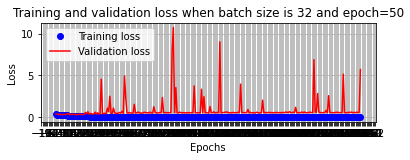

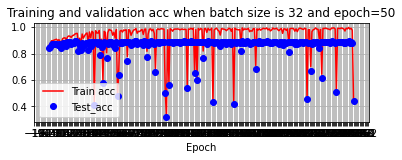

In [52]:
%matplotlib inline
epochs = np.arange(250)+1
plt.subplot(211)
plt.plot(epochs, epoch_loss, 'bo', label='Training loss')
plt.plot(epochs, test_epoch_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32 and epoch=50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, epoch_acc, 'r', label="Train acc")
plt.plot(epochs, test_epoch_acc, 'bo', label="Test_acc")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation acc when batch size is 32 and epoch=50')
plt.xlabel("Epoch")
plt.legend()
plt.grid('off')
plt.show()

In [53]:
# weight distribution

 Distribution of 0.weight 


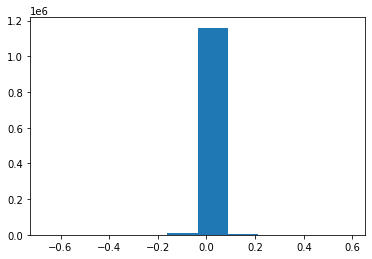

 Distribution of 0.bias 


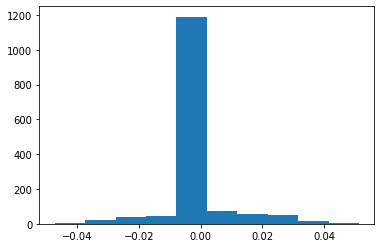

 Distribution of 2.weight 


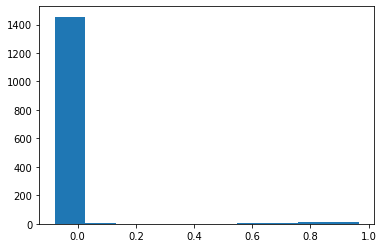

 Distribution of 2.bias 


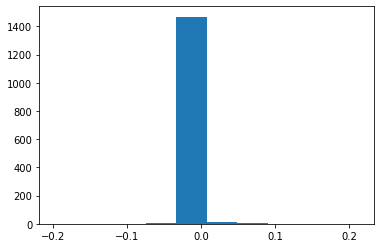

 Distribution of 3.weight 


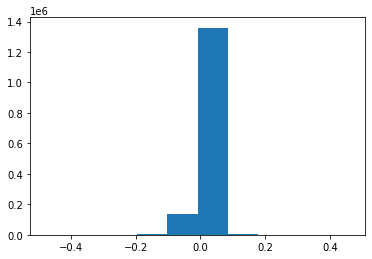

 Distribution of 3.bias 


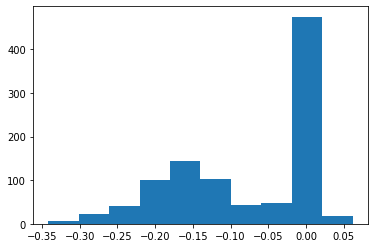

 Distribution of 5.weight 


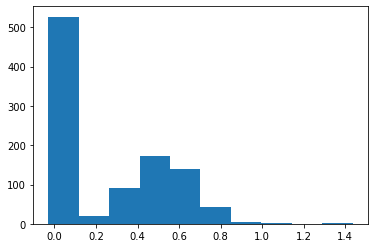

 Distribution of 5.bias 


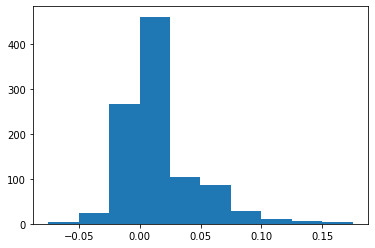

 Distribution of 6.weight 


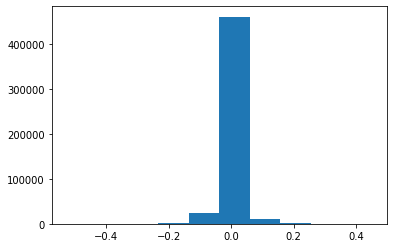

 Distribution of 6.bias 


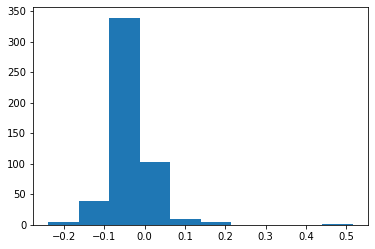

 Distribution of 8.weight 


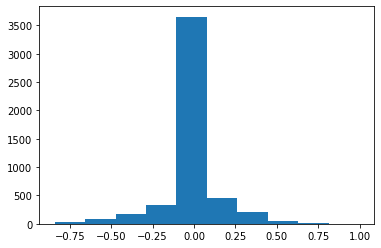

 Distribution of 8.bias 


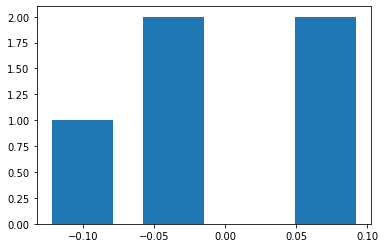

In [54]:
plot_distribution(model.named_parameters())

In [55]:
for x,y in dloader:
  val=model[0](x)
  print(val.shape)
  break

torch.Size([250, 1500])


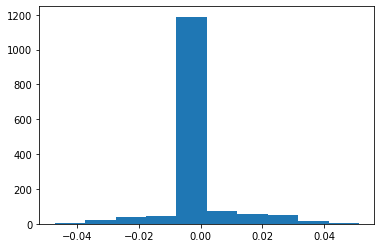

In [57]:
plt.hist(val[4].cpu().detach().numpy().flatten())
plt.show()